In [1]:
import pandas as pd
k=pd.read_excel("fake_news_dataset.xlsx")

In [2]:
k.head(10)

Actual_Post Posted_date  No_of_like  \
0  ኢዜማ  " ለነፍጠኞችና ለ Bilxiginnaa ተላላኪዎች እቺን ሚስጥር ጀ...  2020-02-12       15824   
1  ኦሮሞነትን ትተህ ኢትዮጵያዊ ሁን ለምትሉት! "ኦሮሞነትን ትተህ ኢትዮጵያዊ...  2020-02-12       15824   
2  #ባልደራሱ   ********* " ነፍጠኞች ውጭ ሀገር ሲኖሩም ከ #መንጃፍ...  2020-02-12       15824   
3  ደብተራዎች ስሙ ጉዳችሁን ዘረኞች ጎጠኞች ነፍጠኞች ጅሎች እና ቆማጦች አማ...  2020-02-13       15824   
4  የ Taye Dendea Aredo እስክሪብቶ እኔጋ ደርሷል። " እና በቅርብ...  2020-02-13       15824   
5  የነፍጠኞች ድራማ ቀጠለ """""""""""""""""""""""""""""""...  2020-02-13       15824   
6  የጀዋር ዜግነት ጉዳይ አሁን ባለው ሁኔታ ክርክሩ ጀዋር #አሜሪካዊ ነው ወ...  2020-02-13       15824   
7  ከቡና ቤት ተገኙ  ታግተዋል የተባሉት የብናቤት ሸቃዮች የሽቀላው ኮንትራት...  2020-02-13       15824   
8  #Bilxiginnaa.ፓርቲ ባለ ሀብቶችንና የመንግስት ተቋማትን "የገንዘብ...  2020-02-13       15824   
9  ጠቅላይ ሚኒስትር ዐቢይ  ከመካከለኛው ምስራቅ ሀገራት  ከተውጣጡ የኢትዮጵ...  2020-02-13      264013   

   No_of_follower Page_created_on is_verified label  
0           16202      2019-02-18          No  Fake  
1           16202      2019-02-18          No  Fake  
2           16202      2019-02-18          No  Fake  
3           16202      2019-02-18          No  Fake  
4           16202      2019-02-18          No  Fake  
5           16202      2019-02-18          No  Fake  
6           16202      2019-02-18          No  Fake  
7           16202      2019-02-18          No  Fake  
8           16202      2019-02-18          No  Fake  
9          284338      2014-08-14         Yes  Real

In [3]:
import nltk
import re
import numpy as np

In [4]:
space_pattern = '\s+'
url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
englishword_num ='[a-zA-Z]|[0-9]+'
AmhPunc='[፤።፡፣:,.?/()•“”*፨]+'
special_char = "[፥@#$%^&=?×!,;:_.(){}`'+*<>\"¤—„\® ̄™¡¡\x10»€«·‘0e1b§”¬¦...""f÷\~ ̈©±¥£¶–°• ̃’“|]"
geez_number='[፩፪፫፬፭፮፯፰፱፲፳፴፵፶፷፸፹፺፻] ' # for removing geez number
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                 u"\U0001F1E0-\U0001F1FF"  # flags 
                                 u"\U00002702-\U000027B0"
                                 u"\U000024C2-\U0001F251"
                                 "]+", flags=re.UNICODE)
haa='[ሃ]'; he='[ሐ]'; hu='[ሑ]'; hi='[ሒ]'; ha='[ሓ]'; hie='[ሔ]'; h='[ሕ]'; ho='[ሖ]'; he1='[ኀ]'; hu1='[ኁ]'; hi1='[ኂ]'; ha1='[ኃ]'; hie1='[ኄ]'; h1='[ኅ]'; ho1='[ኆ]';
se='[ሠ]'; su='[ሡ]'; si='[ሢ]'; sa='[ሣ]'; sie='[ሤ]'; s='[ሥ]'; so='[ሦ]'; 
aa1='[ኣ]'; ae='[ዐ]'; au='[ዑ]'; ai='[ዒ]'; aa='[ዓ]'; aie='[ዔ]'; e='[ዕ]'; ao='[ዖ]';
tse='[ጸ]'; tsu='[ጹ]'; tsi='[ጺ]'; tsa='[ጻ]'; tsie='[ጼ]'; ts='[ጽ]'; tso='[ጾ]';

In [5]:
import nltk
corpus=[]
for i in range(0,len(k)):
    Clean_text = re.sub(url_regex,'', str(k['Actual_Post'][i]))
    Clean_text = re.sub(AmhPunc,' ',Clean_text)
    Clean_text=re.sub(special_char,' ',Clean_text)
    Clean_text= re.sub(englishword_num,'',Clean_text)
    Clean_text= re.sub(r'(.)\1+', r'\1\1',Clean_text) #removingelongation in text
    Clean_text = RE_EMOJI.sub(r'', Clean_text)
    Clean_text =re.sub(geez_number,'',Clean_text)
    Clean_text=re.sub('-','',Clean_text)
    Clean_text=re.sub(r'<[^>]*>','', Clean_text)
    Clean_text = Clean_text.replace("\\", "");
    Clean_text = Clean_text.replace("[", "");
    Clean_text = Clean_text.replace("]", "");
    Clean_text = emoji_pattern.sub(r'', Clean_text)
    Clean_text = re.sub(space_pattern,' ',Clean_text)
    ##################################################
    Clean_text= re.sub(he,'ሀ',Clean_text); 
    Clean_text= re.sub(hu,'ሁ',Clean_text);
    Clean_text= re.sub(hi,'ሂ',Clean_text);
    Clean_text= re.sub(ha,'ሀ',Clean_text); 
    Clean_text= re.sub(hie,'ሄ',Clean_text);
    Clean_text= re.sub(h,'ህ',Clean_text);
    Clean_text= re.sub(ho,'ሆ',Clean_text);
    Clean_text= re.sub(haa,'ሀ',Clean_text);
    #######################################################
    Clean_text= re.sub(he1,'ሀ',Clean_text) 
    Clean_text= re.sub(hu1,'ሁ',Clean_text) 
    Clean_text= re.sub(hi1,'ሂ',Clean_text)
    Clean_text= re.sub(ha1,'ሀ',Clean_text)
    Clean_text= re.sub(hie1,'ሄ',Clean_text)
    Clean_text= re.sub(h1,'ህ',Clean_text)
    Clean_text= re.sub(ho1,'ሆ',Clean_text)
    ##########################################################
    Clean_text= re.sub(se,'ሰ',Clean_text) 
    Clean_text= re.sub(su,'ሱ',Clean_text)
    Clean_text= re.sub(si,'ሲ',Clean_text)
    Clean_text= re.sub(sa,'ሳ',Clean_text)
    Clean_text= re.sub(sie,'ሴ',Clean_text) 
    Clean_text= re.sub(s,'ስ', Clean_text)
    Clean_text= re.sub(so,'ሶ',Clean_text)
    ###################################################
    Clean_text= re.sub(ae,'አ',Clean_text) 
    Clean_text= re.sub(au,'ኡ',Clean_text)
    Clean_text= re.sub(ai,'ኢ',Clean_text)
    Clean_text= re.sub(aa,'አ',Clean_text) 
    Clean_text= re.sub(aie,'ኤ',Clean_text)
    Clean_text= re.sub(e,'እ',Clean_text)
    Clean_text= re.sub(ao,'ኦ',Clean_text)
    Clean_text= re.sub(aa1,'አ',Clean_text)
    #############################################
    Clean_text= re.sub(tse,'ፀ',Clean_text) 
    Clean_text= re.sub(tsu,'ፁ',Clean_text) 
    Clean_text= re.sub(tsi,'ፂ',Clean_text)
    Clean_text= re.sub(tsa,'ፃ',Clean_text) 
    Clean_text= re.sub(tsie,'ፄ',Clean_text)
    Clean_text= re.sub(ts,'ፅ',Clean_text)
    Clean_text= re.sub(tso,'ፆ',Clean_text)
    Clean_text= Clean_text.split()
    Clean_text = ' '.join(Clean_text)
    corpus.append(Clean_text)

In [6]:
corpus

['ኢዜማ ለነፍጠኞችና ለ ተላላኪዎች እቺን ሚስጥር ጀባ እንበላችሁ እስቲ ስለ ጀዋር የዜግነት ጉዳይ የምት ጨነቁ ወይንም ስለ ኦሮሞ ነገር የሆነ ሁሉ የምትቀኑት እና አጀንዳ ለመፍጠር የምትሯሯጡ የመንግስት ካድሬዎችና የነፍጠኛ አሽቃባጮች ሁሉ ን በደንብ ጠይቁት የሁለት ሀገር ዜጋ የኤርትራ የአሜሪካ አሁን ያለ ምንም ጥያቄ ሆኖ የአብይ ተላላኪ ሆኗል እና እንዴት የሚለውን ጥያቄ ለሱ አቅርቡለት እሺ',
 'ኦሮሞነትን ትተህ ኢትዮጵያዊ ሁን ለምትሉት ኦሮሞነትን ትተህ ኢትዮጵያዊ ሁን ከተባልኩኝ ኦሮሞነትን እመርጣለው ኦሮሞ ሆኜ ነው ኢትዮጵያዊ የምሆነው እንጂ እኔን ምሰል የሚባለው ነገር አልሰማም እኔን ምሰል የሚለው ነገር ነው የሚያጠፋን ኦሮሞ ኦሮሞነቱን እንደ ያዘ ጉራጌው ማንነቱን እንደያዘ ሱማሌው ሶማሌነቱን እንደ ያዘ ሌላውም እንደዛው ማንነቱን ይዞ ኢትዮጵያዊ መሆን ይችላል እኔን ሁን ማለት በሽታ ነው ኢትዮጵያ ራሱ ጉራማይሌ ስትሆን ታምራለች ሌንጮ ለታ በ አማረኛ ተናጋሪው ኦሮሞ ያለበት አከባቢ ለመኖር ሄድ ኦሮመኛ ከመልመድ ይልቅ ኦሮመኛ ተናጋሪው የራሱን ቋንቋ ትቶ አማረኛ አንዲቀበል ነው እስከ ዛሬ ሲደረግ የነበረው የሚያሳዝነው ነገር እንኳንስ ሰው የመሬቱንም ስም የመቀየር ተግባር ላይ ሲረባረቡበት ነበር እስከዛሬ ሌንጮ ለታ የኦሮሙማ ምሶሶ ነው',
 'ባልደራሱ ነፍጠኞች ውጭ ሀገር ሲኖሩም ከ መንጃፍቃድ ውጪ ሌላ መማር የሚችሉት ነገር የለም እሱንም በ ቆሻሻው አማረኛ ፊደል የመንጃ ፍቃድ ስልጠና ስለሚሰጥ ነው ባልደራሱ እስክንድር ነጋ አሜሪካ ዩንቨርስቲ ከሚባለው ተቋም በኢኮኖሚክስ ዲግሪ አንዳለው በተደጋጋሚ ሲያነሰ እንደ ነበር ይታወሳል ነገር ግን ከዩንቨርስቲው የተገኘው መረጃ እንደ ሚያመለክተው እስክንድር ነጋ የሚባለው ሰው በዚህ ዩንቨርስቲ ውስጥ ትምህርቱን እን

In [7]:
from gensim.models import word2vec  
from gensim.models.word2vec import Word2Vec


In [8]:
tokens=[]


from nltk.tokenize import word_tokenize


tokenized_sents = [word_tokenize(i) for i in corpus]
for i in tokenized_sents:
    #print(i)
    tokens.append(i)
    
tokens=[[word for word in article if len(word)>1]for article in tokens]


In [9]:
tokens[4500]

['አቃቤ',
 'ህግ',
 'የኦኤምኤን',
 'ጋዜጠኛ',
 'ጉዮ',
 'ላይ',
 'ያቀረበው',
 'ይግባኝ',
 'ጥያቄ',
 'ተቀባይነት',
 'አገኘ',
 'በእነ',
 'ደጀኔ',
 'ጣፋ',
 'መዝገብ',
 'ላይ',
 'የተሰጠው',
 'የዋስትና',
 'መብት',
 'ለጊዜው',
 'ታግዶ',
 'እንዲቆይ',
 'ተወሰነ',
 'ሰኞ',
 'እለት',
 'ነሀሴ',
 'በፌደራል',
 'የመጀመሪያ',
 'ደረጃ',
 'አራዳ',
 'ምድብ',
 'ችሎት',
 'የኦፌኮ',
 'ከፍተኛ',
 'አመራሮች',
 'ደጀኔ',
 'ጣፋን',
 'ጨምሮ',
 'የኦኤም',
 'ኤን',
 'ጋዜጠኛ',
 'ጉዮ',
 'ዋርዬ',
 'እንዲሁም',
 'ኮርሳ',
 'ደቻሳ',
 'እና',
 'ሚሻ',
 'አደም',
 'የዋስትና',
 'መብት',
 'ተጠብቆላቸው',
 'እንዲለቀቁ',
 'ቢወስንም',
 'አቃቤ',
 'ህግ',
 'ይግባኝ',
 'ባለው',
 'መሰረት',
 'እስካሁን',
 'ሳይፈቱ',
 'ቀርተዋል',
 'አቃቤ',
 'ህግ',
 'የእነዚህ',
 'ሰዎች',
 'የዋስትና',
 'መብት',
 'መፈቀድ',
 'የለበትም',
 'ክስ',
 'ለመመስረትም',
 'ቀን',
 'ይሰጠኝ',
 'ብሎ',
 'ለመጀመሪያ',
 'ፍርድ',
 'ቤት',
 'ቢያመለክትም',
 'ተቀባይነት',
 'ባለመግኘቱም',
 'ወደ',
 'ከፍተኛ',
 'ፍርድ',
 'ቤት',
 'በመሄድ',
 'ይግባኝ',
 'መጠየቁ',
 'የተጠርጣሪዎቹ',
 'ጠበቃ',
 'አቶ',
 'ደጀኔ',
 'ፍቃዱ',
 'ለቢቢሲ',
 'ተናግረዋል',
 'በዚህም',
 'መሰረት',
 'ትና',
 'ንት',
 'ማክሰኞ',
 'በፌደራል',
 'ከፍተኛ',
 'ፍርድ',
 'ቤት',
 'የቀረቡ',
 'ሲሆን',
 'አቃቤ',
 'ህግ',
 'ክስ',
 'ለመመስረት',
 'ቀን',
 'ይሰጠኝ',
 'እነዚህ',
 'ተጠርጣሪዎች',
 'መለቀቅ',

In [10]:
import re
stopword=[]
with open('stopworrrrd.txt','r' ,encoding='utf8') as f:
    f.readline()
    for i in f:
       
        stopword.append(re.sub('[\n]+', '',str(i)))

In [11]:
after_stopword_remove=[]
after_stopword_remove=[[word for word in article if word not in stopword]for article in tokens]
after_stopword_remove

[['ኢዜማ',
  'ለነፍጠኞችና',
  'ተላላኪዎች',
  'እቺን',
  'ሚስጥር',
  'ጀባ',
  'እንበላችሁ',
  'እስቲ',
  'ጀዋር',
  'የዜግነት',
  'ጉዳይ',
  'የምት',
  'ጨነቁ',
  'ኦሮሞ',
  'ሁሉ',
  'የምትቀኑት',
  'አጀንዳ',
  'ለመፍጠር',
  'የምትሯሯጡ',
  'የመንግስት',
  'ካድሬዎችና',
  'የነፍጠኛ',
  'አሽቃባጮች',
  'ሁሉ',
  'በደንብ',
  'ጠይቁት',
  'የሁለት',
  'ሀገር',
  'ዜጋ',
  'የኤርትራ',
  'የአሜሪካ',
  'ምንም',
  'ጥያቄ',
  'የአብይ',
  'ተላላኪ',
  'ሆኗል',
  'እንዴት',
  'ጥያቄ',
  'ለሱ',
  'አቅርቡለት',
  'እሺ'],
 ['ኦሮሞነትን',
  'ትተህ',
  'ኢትዮጵያዊ',
  'ሁን',
  'ለምትሉት',
  'ኦሮሞነትን',
  'ትተህ',
  'ኢትዮጵያዊ',
  'ሁን',
  'ከተባልኩኝ',
  'ኦሮሞነትን',
  'እመርጣለው',
  'ኦሮሞ',
  'ሆኜ',
  'ኢትዮጵያዊ',
  'የምሆነው',
  'እኔን',
  'ምሰል',
  'የሚባለው',
  'አልሰማም',
  'እኔን',
  'ምሰል',
  'የሚለው',
  'የሚያጠፋን',
  'ኦሮሞ',
  'ኦሮሞነቱን',
  'ያዘ',
  'ጉራጌው',
  'ማንነቱን',
  'እንደያዘ',
  'ሱማሌው',
  'ሶማሌነቱን',
  'ያዘ',
  'ሌላውም',
  'እንደዛው',
  'ማንነቱን',
  'ኢትዮጵያዊ',
  'ይችላል',
  'እኔን',
  'ሁን',
  'በሽታ',
  'ኢትዮጵያ',
  'ራሱ',
  'ጉራማይሌ',
  'ስትሆን',
  'ታምራለች',
  'ሌንጮ',
  'ለታ',
  'አማረኛ',
  'ተናጋሪው',
  'ኦሮሞ',
  'ያለበት',
  'አከባቢ',
  'ለመኖር',
  'ሄድ',
  'ኦሮመኛ',
  'ከመልመድ',
  'ይልቅ',
  'ኦ

In [12]:
kk=0
for j in after_stopword_remove:
    with open('C:/Users/MenbiAmel/Music/fake news detection/file/'+str(kk)+'.txt','w', encoding='utf8') as f:
        for listitem in j:
            f.write('%s\n' % listitem)
    kk+=1

In [ ]:
import string,l3
#stopwordsl=mymodule.importing_files_for_stopwords()
for i in range(0,4589):
    document='C:/Users/MenbiAmel/Music/fake news detection/file/'+str(i)+'.txt'
    l3.anal_file('am', document,'C:/Users/MenbiAmel/Music/fake news detection/Post_Stemmed/'+str(i)+'.csv', root=False, gram=False,nbest=1)





#   እንዲሁም  
for i in range(0,4589):
    unstemmed_word=open('C:/Users/MenbiAmel/Music/fake news detection/file/'+str(i)+'.txt','r',encoding="utf8")
    unstemmed_wordm=unstemmed_word.read()
    unstemmed_wordarray=[]
    unstemmed_wordmarray=unstemmed_wordm
    unstemmed_wordmtostrng="".join(unstemmed_wordmarray)
    unstemmed_wordm_final=unstemmed_wordmtostrng.split()
    unstemmed_wordm_final2=[]
    for ss in unstemmed_wordm_final:
        table = str.maketrans('', '', string.punctuation)
        ss = [w.translate(table) for w in ss]
        ss="".join(ss)
        unstemmed_wordm_final2.append(ss)

    df=pd.read_csv('C:/Users/MenbiAmel/Music/fake news detection/Post_Stemmed/'+str(i)+'.csv',sep=";",names=['word:'])
    final_stemmed_val=[]
    for k in range(0,len(df)):
        x=df.iloc[k,0]  
        final_stemmed_val.append(x)
    
    words_to_stemm=[]
    for xx in unstemmed_wordm_final2:
        adding_word_suffix='word: '+xx
        words_to_stemm.append(adding_word_suffix)
    ff=[]
    for yy in range(0,len(final_stemmed_val)):
        if final_stemmed_val[yy] not in words_to_stemm:
            ff.append(final_stemmed_val[yy])
    
    jj=[]
    for mm in range(0,len(ff)):
        table = str.maketrans('', '', string.punctuation)
        term_to_stem = [w.translate(table) for w in ff[mm]]
        term_to_stem="".join(term_to_stem)
       # term_to_stem= term_to_stem.split()
        if term_to_stem=="":
            continue
        elif len(term_to_stem)<2:
            continue
        else:
            jj.append(term_to_stem)
    mmm=" ".join(jj)
    mid_file = open('C:/Users/MenbiAmel/Music/fake news detection/Stemmed_puncR/'+str(i)+'.txt', "w",encoding="utf8")
    mid_file.write((mmm))
    mid_file.close()

In [13]:
stemed_file=[]

for i in range(0,4590):
    unstemmed_word=open('C:/Users/MenbiAmel/Music/fake news detection/Stemmed_puncR/'+str(i)+'.txt','r',encoding="utf8")
    unstemmed_wordm=unstemmed_word.read()
    unstemmed_wordarray=[]
    unstemmed_wordmarray=unstemmed_wordm
    stemed_file.append(unstemmed_wordmarray)

In [14]:
stem=[]


from nltk.tokenize import word_tokenize


stemed_sents = [word_tokenize(j) for j in stemed_file]
for j in stemed_sents:
    #print(i)
    stem.append(j)
    
stem=[[word for word in article if len(word)>2]for article in stem]

In [15]:
from nltk.tokenize import word_tokenize
def tokenizer_text(file):
    stem=[]
    stemed_sents = [word_tokenize(j) for j in file]
    for j in stemed_sents:
        stem.append(j)
    stem=[[word for word in article if len(word)>2]for article in stem]
    return stem
    
stem=tokenizer_text(stemed_file)
stem

[['መንግስት',
  'ህዝብ',
  'ተጠየቀ',
  'ህጋዊ',
  'ጥያቄ',
  'ተገባ',
  'ምላሽ',
  'ዎላይታ',
  'ዩኒቨርሲቲ',
  'ፕረዚዳንት'],
 ['አመራ',
  'ሙሁራ',
  'ትግራይ',
  'ሙሁራ',
  'አከራከረ',
  'ነጠብ',
  'መሀሪ',
  'ዮሀንስ',
  'ተናገረ',
  'መለስ',
  'ዜናዊ',
  'አላማ',
  'ሚኒሊክ',
  'ስርአተ',
  'ስርአት',
  'አስቀጠለ',
  'ነብር',
  'አበየ',
  'እውነት',
  'ሚኒሊክ',
  'ስርአት',
  'ናፈቀ',
  'ነፍጠኛ',
  'ጠላት',
  'አወገዘ',
  'እውነት',
  'መለስ',
  'ኢትዮጵያ',
  'ታላቅ'],
 ['አብይ',
  'አህመድ',
  'ልቦና',
  'መዋቅር',
  'ጤናማ',
  'ደረጃ',
  'ህዝብ',
  'ተቀበለ',
  'ቀድሞ',
  'ኢንሳ',
  'ምክትል',
  'ሀላፊ',
  'ቢንያ',
  'ተወልደ',
  'አውሎ',
  'ሚድያ',
  'አደረገ',
  'የተናገሩት',
  'ተናገረ',
  'አጋጠመ',
  'እስር',
  'ተማረ',
  'ምናም',
  'አላማ',
  'ነበረ',
  'አላማ',
  'አስፈራራ',
  'ባሪያ',
  'ፈለገ',
  'ነበረ',
  'አበየ',
  'ከባድ',
  'ፈተና',
  'ፈጠረ',
  'ኢንሳም',
  'ለቀቀ',
  'ሀሳብ',
  'ነበረ',
  'እድል',
  'ተጠቀመ',
  'ኢንሳ',
  'አባልነት',
  'ጥረት',
  'ተደረገ',
  'ገመገመ',
  'ነበረ',
  'አቅም',
  'አገለገለ',
  'አብይ',
  'ደረሰ',
  'አደረገ',
  'አሁን',
  'ተወሰነ',
  'አደረገ',
  'ድፍረት',
  'ጤነኛ',
  'ልቦና',
  'መዋቅር',
  'አወቀ',
  'ተመራመረ',
  'ጠየቀ',
  'ድፍረት',
  'ነበረ',
  'አሁን',
  'አገኘ',
  'አገ

In [16]:
feature_size=150
window_context=10
min_word_count=2
sample=1e-3

In [17]:
w2v_model=word2vec.Word2Vec(tokens,size=feature_size,window=window_context,min_count=min_word_count,sample=sample,iter=50)
similar_words={search_term:[item[0] for item in w2v_model.wv.most_similar([search_term],topn=5)]
              for search_term in['የሚያወናብዱ','ፍትህ','ህዝብ','መታገል']}

In [18]:
similar_words

{'የሚያወናብዱ': ['ሉአላዊንትና', 'የሀገራቸውን', 'ጠላታችን', 'ለጥበቃ', 'ወዳጅም'],
 'ፍትህ': ['ከምናደርገው', 'ገብረፃዲቅ', 'እንድያገኝ', 'እንዲሰለፉ', 'ሰአረ'],
 'ህዝብ': ['ህዝብና', 'ህዝብም', 'ተወላጆች', 'ጭፍጨፋ', 'ቤተክርስቲያኑ'],
 'መታገል': ['ህዝብን', 'ለመብቱ', 'ዘራፍ', 'ሀገርን', 'መቃወም']}

In [18]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector=np.zeros((num_features,),dtype="float64")
    nwords=0.
    
    for word in words:
        if word in vocabulary:
            nwords=nwords+1.
            feature_vector=np.add(feature_vector,model[word])
            
    if nwords:
        feature_vector=np.divide(feature_vector, nwords)
    
    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary=set(model.wv.index2word)
    features=[average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
             for tokenized_sentence in corpus]
    return np.array(features)


x=averaged_word_vectorizer(corpus=tokens, model=w2v_model, num_features=feature_size )
df1=pd.DataFrame(x)
        
            

C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [20]:
print(df1)

           0         1         2         3         4         5         6    \
0    -1.028233 -0.157465  0.117434  0.743744 -0.318048 -0.400815  0.014401   
1    -1.148152 -0.098962  0.292684 -0.347412  0.153666 -0.100566  0.034265   
2    -0.310485 -0.306852  0.038536 -0.256679  0.418850  0.062591 -0.129970   
3    -1.416749 -0.248419  0.481027  0.174764  0.498609 -1.457831  0.498374   
4    -0.365045 -0.339805  0.405234 -0.124978 -0.019385 -0.221266 -0.782402   
...        ...       ...       ...       ...       ...       ...       ...   
4585  0.538246  0.187555 -0.176883 -0.576930  0.041816  0.018344  0.469023   
4586  0.060804 -0.150988  0.042546 -0.754474 -0.007170 -0.805614 -0.109824   
4587  0.088161 -0.052113  0.198396 -0.164082  0.212208  0.123467 -1.915417   
4588  0.052364  0.659779  0.340504  0.661153 -0.643460  0.153014  0.515056   
4589  0.435701 -0.261584 -0.144531 -0.287432  0.925304 -0.565514  0.145185   

           7         8         9    ...       140       141    

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
k['year']= k['Page_created_on'].dt.year
k['month']=k['Page_created_on'].dt.month
k['day']=k['Page_created_on'].dt.day

In [21]:
verified=pd.get_dummies (k.is_verified, prefix='verify').iloc [:, -1:]
lab=pd.get_dummies (k.label, prefix='Label').iloc [:, 1:]

In [22]:
k= pd.concat ([k, verified, lab], axis='columns')

In [23]:
k= k.drop (['is_verified','label'], axis='columns')

In [24]:
feature_columnss=k[['No_of_like','No_of_follower','year','month','day','verify_yes']].values



In [25]:
df2=pd.DataFrame(feature_columnss)

In [26]:
y=k[['Label_Real']].values

In [27]:
x=pd.concat([df2,df1],axis=1)

In [28]:
k=pd.DataFrame(x)

C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.08082506 0.05591854 0.11465564 0.03786266 0.0414292  0.06539083
 0.02027451 0.00205482 0.0012185  0.00110835 0.00278014 0.00134092
 0.00062746 0.0012968  0.00083689 0.00095642 0.00101581 0.00083865
 0.00087533 0.00102415 0.02268652 0.00208573 0.00084481 0.00066804
 0.00061932 0.01734103 0.00160466 0.00136719 0.00114585 0.00104023
 0.0016385  0.00614003 0.0010763  0.00557809 0.00247529 0.00101928
 0.00125556 0.00134589 0.00135521 0.01973647 0.00105414 0.01355135
 0.00158641 0.00099323 0.01016657 0.00091981 0.0010068  0.00272125
 0.00476614 0.00190405 0.00096714 0.00117563 0.00108756 0.00155614
 0.00077346 0.00124542 0.00203553 0.00166694 0.02510385 0.00860073
 0.01402813 0.00112862 0.01018786 0.00252143 0.00126958 0.00175173
 0.00868016 0.00689049 0.00185331 0.00147607 0.0009079  0.00084409
 0.01167406 0.00139236 0.00085976 0.00134058 0.00902467 0.00246996
 0.00225085 0.00203724 0.00085475 0.00444187 0.00724829 0.00235285
 0.01723779 0.00134787 0.00147079 0.00186566 0.02453058 0.0061

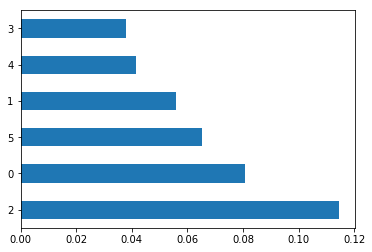

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importance=pd.Series(model.feature_importances_, index=k.columns.name)
feat_importance.nlargest(6).plot(kind='barh')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3672, 156) (918, 156) (3672, 1) (918, 1)


In [55]:
values=[i for i in range(1,21)]


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
train_scores, test_scores = list(), list()
values=[i for i in range(1,21)]
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
   # print(train_acc)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    

>1, train: 0.979, test: 0.985
>2, train: 0.983, test: 0.988
>3, train: 0.992, test: 0.991
>4, train: 0.998, test: 0.995
>5, train: 0.998, test: 0.998
>6, train: 1.000, test: 0.997
>7, train: 1.000, test: 0.998
>8, train: 1.000, test: 0.996
>9, train: 1.000, test: 0.998
>10, train: 1.000, test: 0.997
>11, train: 1.000, test: 0.996
>12, train: 1.000, test: 0.998
>13, train: 1.000, test: 0.997
>14, train: 1.000, test: 0.996
>15, train: 1.000, test: 0.996
>16, train: 1.000, test: 0.996
>17, train: 1.000, test: 0.996
>18, train: 1.000, test: 0.997
>19, train: 1.000, test: 0.997
>20, train: 1.000, test: 0.998


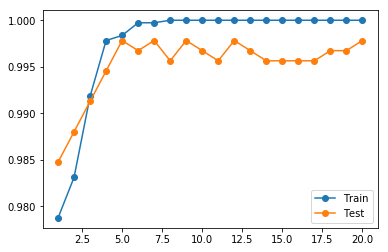

In [59]:
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [31]:
from sklearn import metrics
import numpy as np
import itertools

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
from sklearn.model_selection import StratifiedKFold

In [34]:
from sklearn.linear_model import  LogisticRegression
logreg=LogisticRegression(C=1e5, max_iter=10000)

C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of LogisticRegression  classifier on training set: 0.96
Accuracy of LogisticRegression classifier on test set: 0.95
accuracy:   0.952
Confusion matrix, without normalization


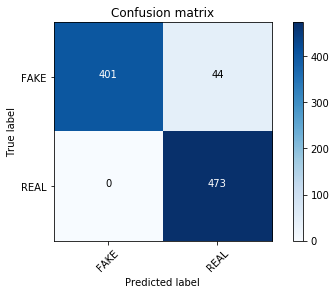

In [35]:
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of LogisticRegression  classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       445
           1       0.91      1.00      0.96       473

    accuracy                           0.95       918
   macro avg       0.96      0.95      0.95       918
weighted avg       0.96      0.95      0.95       918



In [37]:
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore1=cross_val_score(logreg,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(logreg,x,np.ravel(y),cv=5)
cvscore1,cvscore1.mean()

(array([0.98257081, 0.96078431, 0.82026144, 0.89542484, 0.99455338]),
 0.9307189542483659)

accuracy of Logistic Regression with cv:0.9307189542483659
Confusion matrix, without normalization


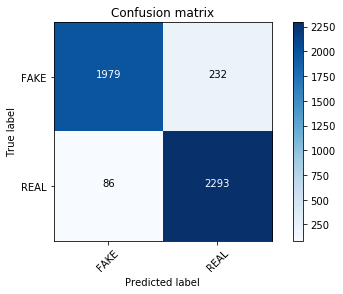

In [38]:
print('accuracy of Logistic Regression with cv:'+str(cvscore1.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2211
           1       0.91      0.96      0.94      2379

    accuracy                           0.93      4590
   macro avg       0.93      0.93      0.93      4590
weighted avg       0.93      0.93      0.93      4590



In [41]:
from sklearn.svm import LinearSVC
svmmodel_w2v= LinearSVC(C=0.01, multi_class='ovr', max_iter=10000, 
                        class_weight='balanced',penalty='l2' ) 

C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy of support vector machine   classifier on training set: 0.96
Accuracy of support vector machine classifier on test set: 0.95
accuracy:   0.952
Confusion matrix, without normalization


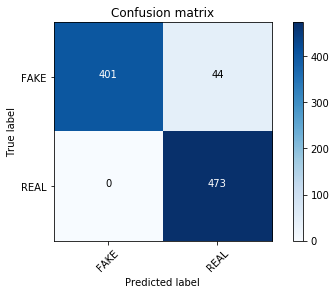

In [42]:
svmmodel_w2v=svmmodel_w2v.fit(X_train, y_train)
pred = svmmodel_w2v.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of support vector machine   classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of support vector machine classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       445
           1       0.91      1.00      0.96       473

    accuracy                           0.95       918
   macro avg       0.96      0.95      0.95       918
weighted avg       0.96      0.95      0.95       918



In [44]:
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore2=cross_val_score(svmmodel_w2v,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(svmmodel_w2v,x,np.ravel(y),cv=5)
cvscore2,cvscore2.mean()

C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packag

(array([0.98801743, 0.96078431, 0.94989107, 0.89542484, 0.98910675]),
 0.9566448801742918)

accuracy of Support vector machine with cv:0.9566448801742918
Confusion matrix, without normalization


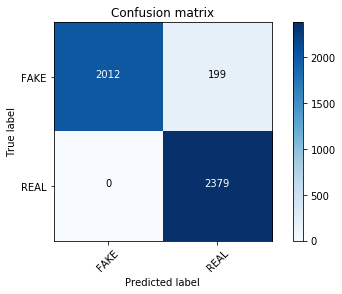

In [45]:
print('accuracy of Support vector machine with cv:'+str(cvscore2.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2211
           1       0.92      1.00      0.96      2379

    accuracy                           0.96      4590
   macro avg       0.96      0.95      0.96      4590
weighted avg       0.96      0.96      0.96      4590



C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of RandomForest  classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 1.00
accuracy:   0.997
Confusion matrix, without normalization


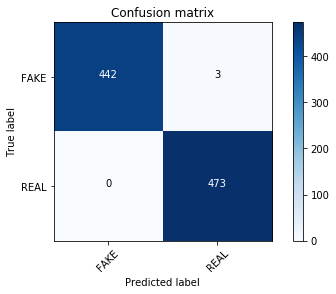

In [47]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=400, n_jobs=4)
Random.fit(X_train, y_train)
pred = Random.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of RandomForest  classifier on training set: {:.2f}'
     .format(Random.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(Random.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
train_scores, test_scores = list(), list()
values=[i for i in range(1,21)]
for i in values:
    model = RandomForestClassifier(n_estimators=400, n_jobs=4,max_depth=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
   # print(train_acc)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    

C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>1, train: 0.978, test: 0.978


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>2, train: 0.992, test: 0.990


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>3, train: 0.994, test: 0.990


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>4, train: 0.996, test: 0.996


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>5, train: 0.999, test: 0.997


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>6, train: 0.999, test: 0.996


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>7, train: 0.999, test: 0.997


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>8, train: 1.000, test: 0.997


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>9, train: 1.000, test: 0.997


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>10, train: 1.000, test: 0.996


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>11, train: 1.000, test: 0.997


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>12, train: 1.000, test: 0.997


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>13, train: 1.000, test: 0.996


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>14, train: 1.000, test: 0.997


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>15, train: 1.000, test: 0.997


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>16, train: 1.000, test: 0.997


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>17, train: 1.000, test: 0.996


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>18, train: 1.000, test: 0.997


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>19, train: 1.000, test: 0.998


C:\Users\MenbiAmel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


>20, train: 1.000, test: 0.997


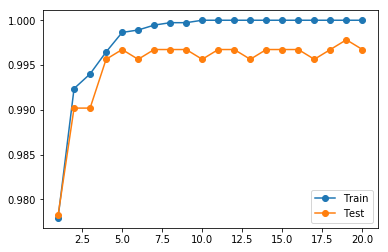

In [61]:
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       445
           1       0.99      1.00      1.00       473

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918



In [49]:
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore3=cross_val_score(Random,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(Random,x,np.ravel(y),cv=5)
cvscore3,cvscore3.mean()

(array([0.99891068, 0.99019608, 0.99891068, 0.9422658 , 1.        ]),
 0.9860566448801744)

accuracy of Random Forest with cv:0.9860566448801744
Confusion matrix, without normalization


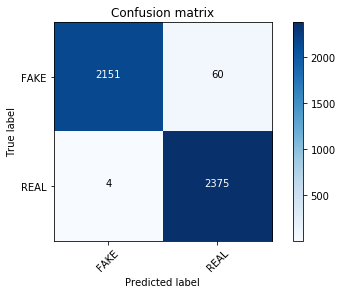

In [50]:
print('accuracy of Random Forest with cv:'+str(cvscore3.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2211
           1       0.98      1.00      0.99      2379

    accuracy                           0.99      4590
   macro avg       0.99      0.99      0.99      4590
weighted avg       0.99      0.99      0.99      4590



In [52]:
ErrorAnalysisDashboard(global_explanation, model, dataset=x_test, true_y=y_test)

NameError: name 'ErrorAnalysisDashboard' is not defined